# Titanic - Machine Learning from Disaster

![title](header.png)

Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's start by importing the train and test data...

In [2]:
# Load the data sets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Let's analyze the data from the training set

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Function to extract the title pronoun from the name
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Name'].apply(extract_title)

In [7]:
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [8]:
def corrigir_title(title):
    # Lista de títulos aceitáveis
    titulos_aceitaveis = ['Mr', 'Miss', 'Mrs', 'Master']
    # Verificar se o título atual está na lista de aceitáveis
    if title in titulos_aceitaveis:
        return title
    else:
        return 'Rare'

# Aplicar a função à coluna 'Title'
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].apply(corrigir_title)

In [9]:
# Substituição de valores ausentes nos datasets
for dataset in [train_data, test_data]:
    age_mean = dataset['Age'].mean()
    dataset['Age'] = dataset['Age'].fillna(age_mean)

# -------------------------------------------------------------------------
# Encontrar a moda da coluna 'Embarked'
moda_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(moda_embarked)

# -------------------------------------------------------------------------
# Encontrar a mediana da coluna 'Fare'
fare_mean = dataset['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(fare_mean)

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# create 'FamilySize'
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# HasCabin
for dataset in [train_data, test_data]:
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
    
# create 'IsAlone'
for dataset in [train_data, test_data]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# create 'IsMother'
for dataset in [train_data, test_data]:
    dataset['IsMother'] = 0
    dataset.loc[(dataset['Sex'] =='female') & (dataset['Parch'] >= 1) & (dataset['Age'] >= 20), 'IsMother'] = 1

# create 'IsMr'
for dataset in [train_data, test_data]:
    dataset['IsMr'] = 0
    dataset.loc[dataset['Title'] == 'Mr', 'IsMr'] = 1

# create 'IsElderly'
for dataset in [train_data, test_data]:
    dataset['IsElderly'] = 0
    dataset.loc[dataset['Age'] >= 65, 'IsElderly'] = 1

# create 'IsMale' and 'Class=2'
for dataset in [train_data, test_data]:
    dataset['IsMale'] = 0
    dataset.loc[(dataset['Sex'] =='male') & (dataset['Pclass'] ==2),'IsMale'] = 1

# create 'IsFemale' and 'Class=1'
for dataset in [train_data, test_data]:
    dataset['IsFemale'] = 0
    dataset.loc[(dataset['Sex'] =='female') & (dataset['Pclass'] ==1),'IsFemale'] = 1


for dataset in [train_data, test_data]:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 24, 35, 60, 120],
                                labels=['Children', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elder'])
    
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0, 7.91, 14.45, 31, 120],
                                 labels=['low_fare', 'median_fare', 'average_fare', 'high_fare'])

In [14]:
for dataset in [train_data, test_data]:
    dataset.drop(columns='Name', inplace=True)
    dataset.drop(columns='Ticket', inplace=True)
    dataset.drop(columns='Cabin', inplace=True)

train_data.drop(columns='PassengerId', inplace=True)

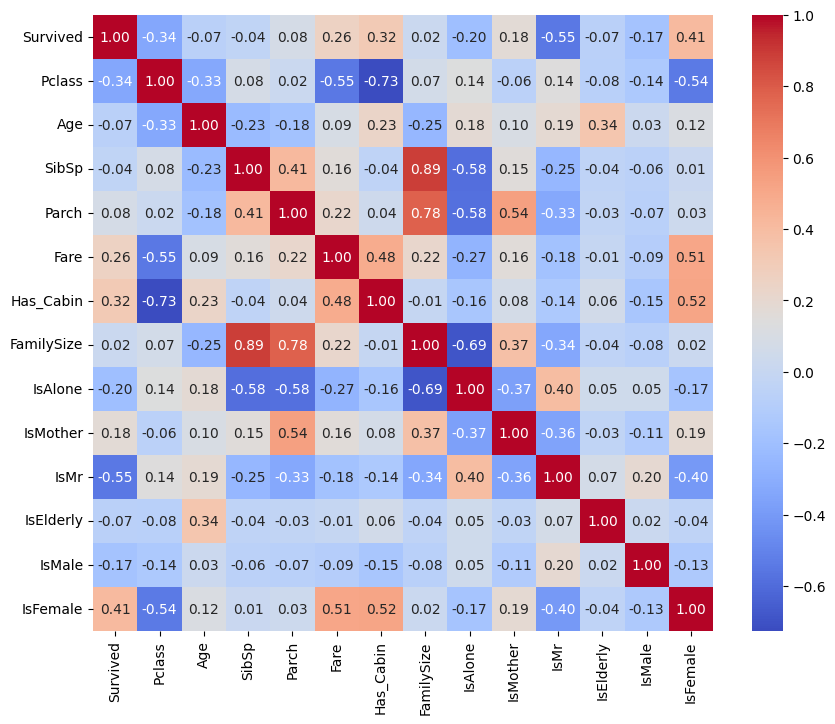

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.select_dtypes(include=np.number).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


Gráficos - Treino:


C:\Users\junio\AppData\Local\Temp\ipykernel_43780\8171980.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6.4, 4.8))


<Figure size 640x480 with 0 Axes>

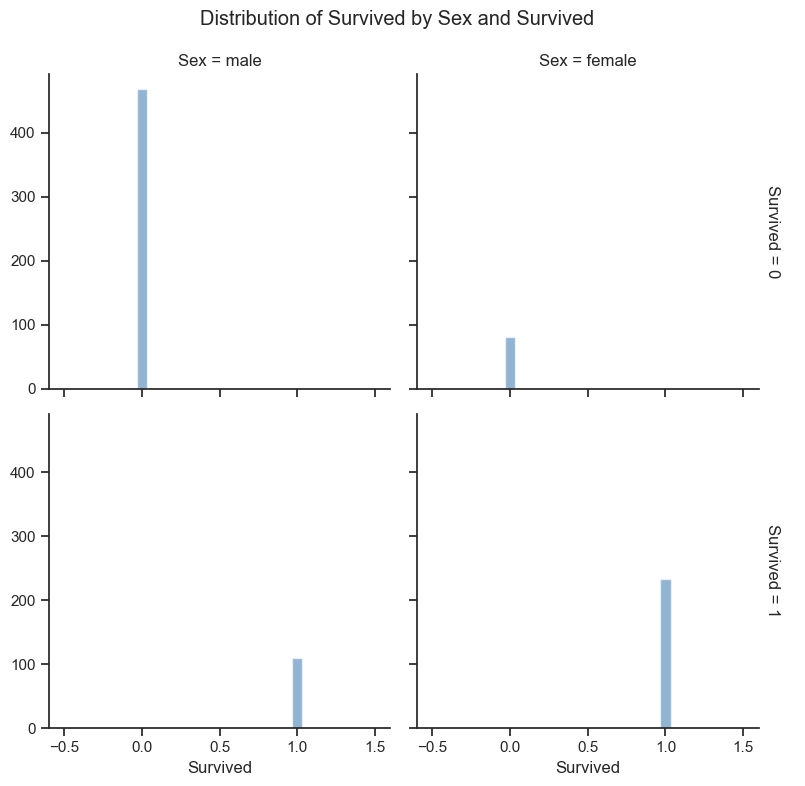

<Figure size 640x480 with 0 Axes>

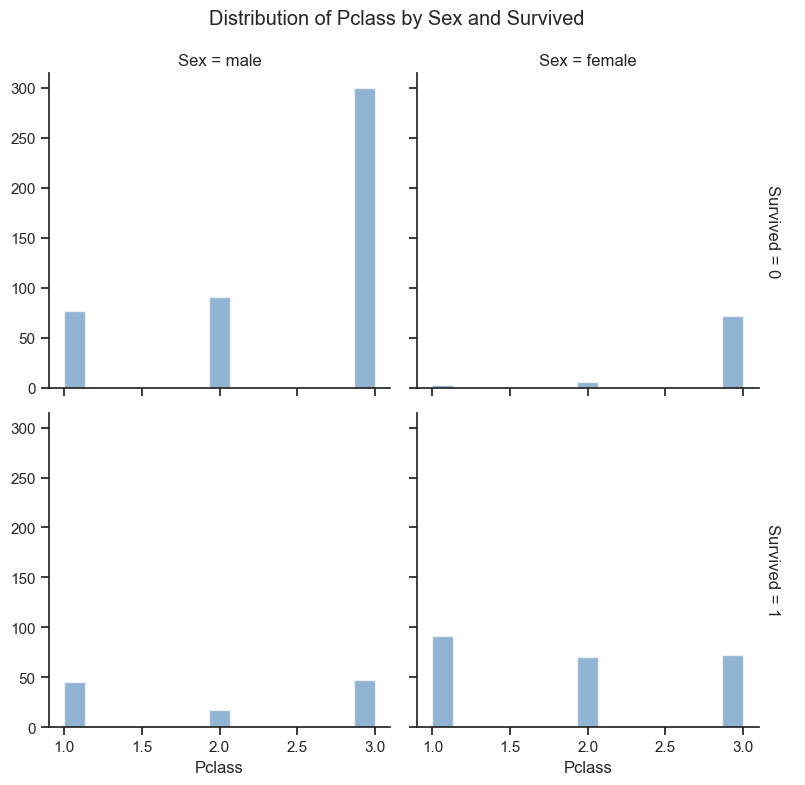

<Figure size 640x480 with 0 Axes>

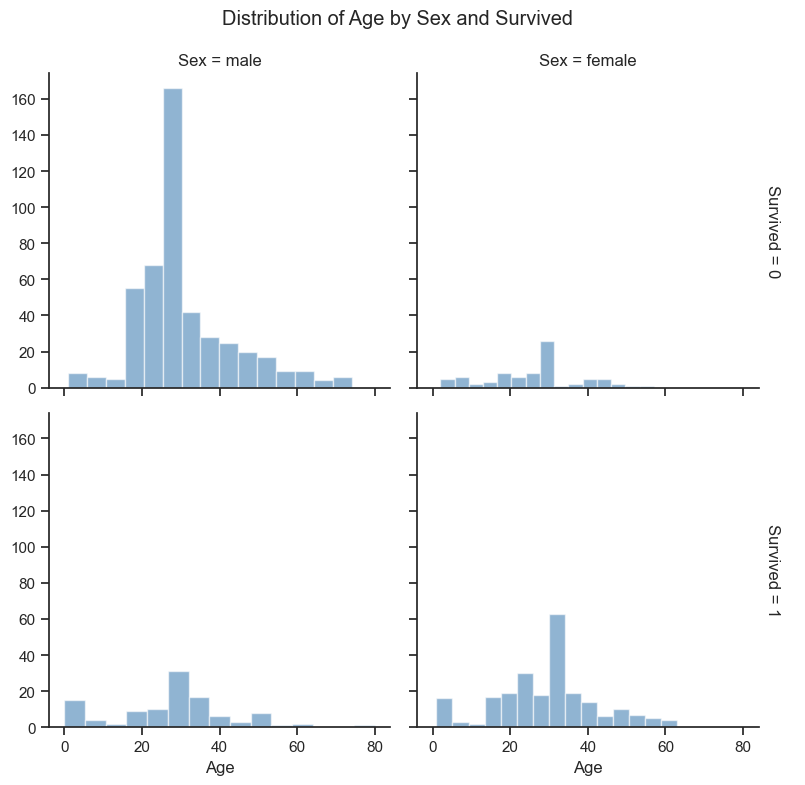

<Figure size 640x480 with 0 Axes>

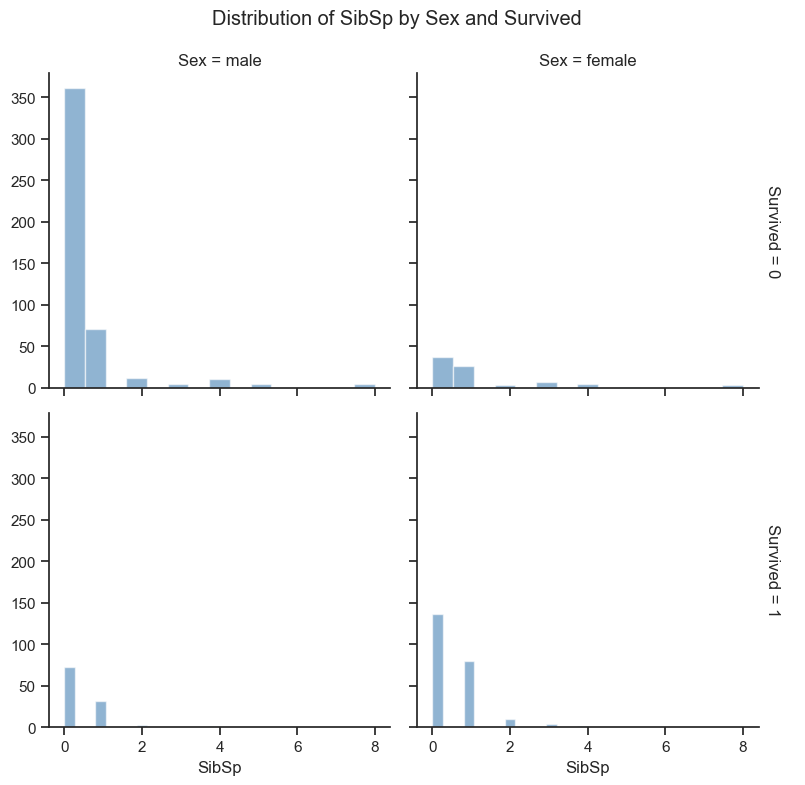

<Figure size 640x480 with 0 Axes>

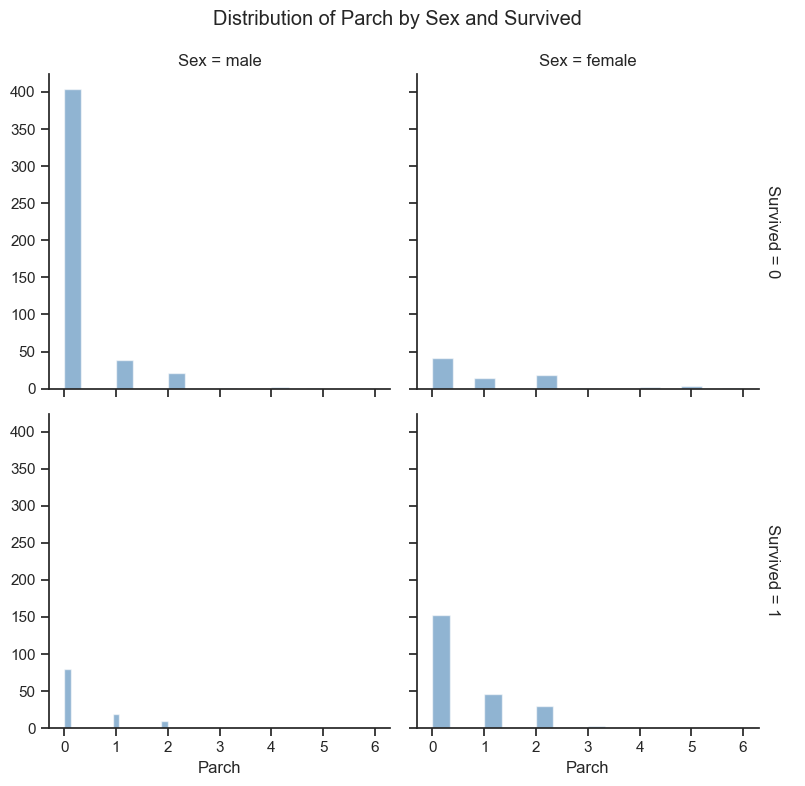

<Figure size 640x480 with 0 Axes>

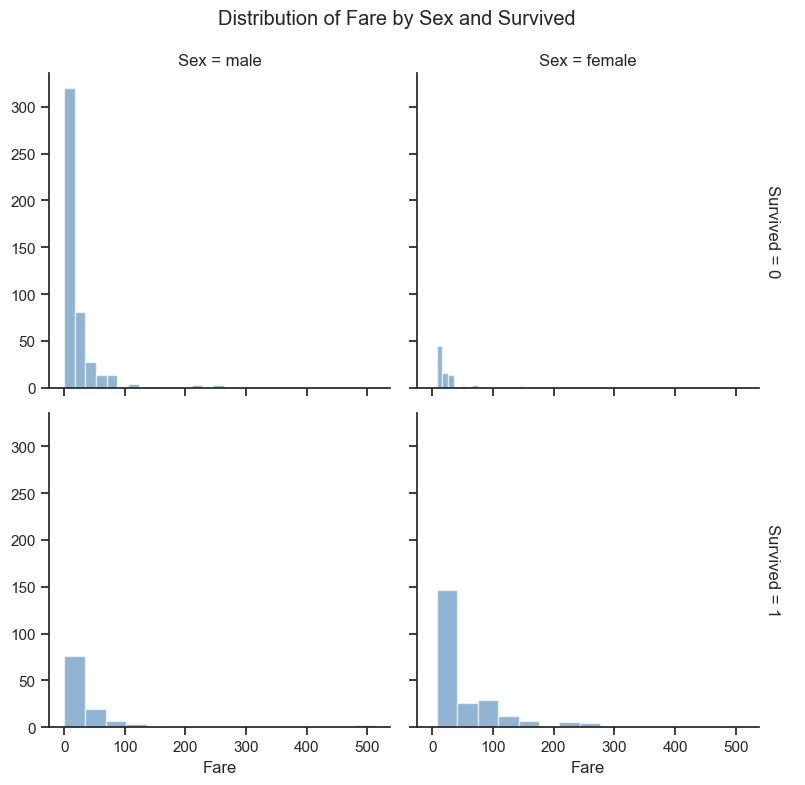

<Figure size 640x480 with 0 Axes>

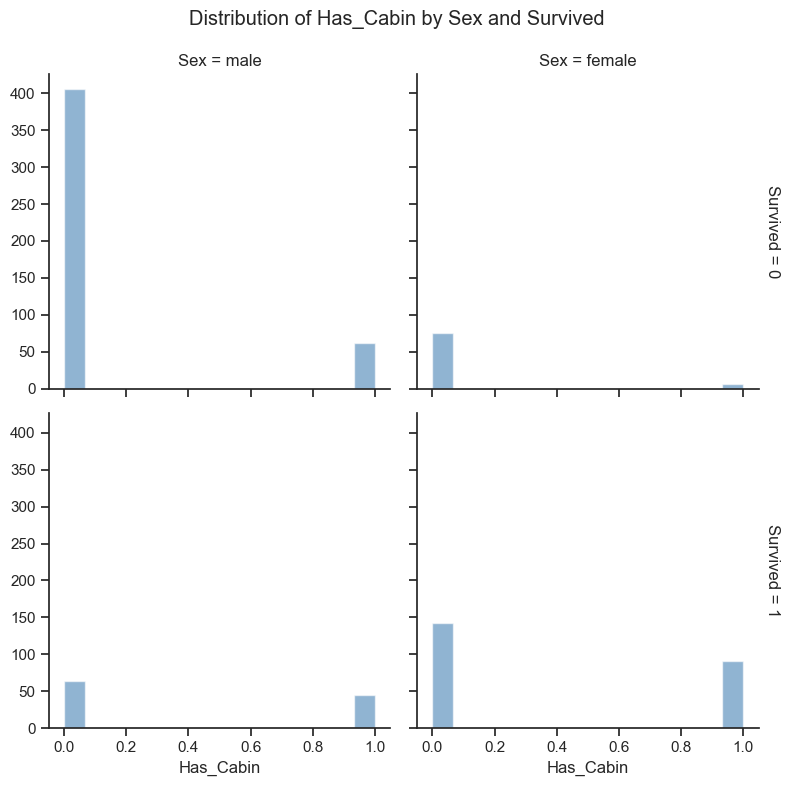

<Figure size 640x480 with 0 Axes>

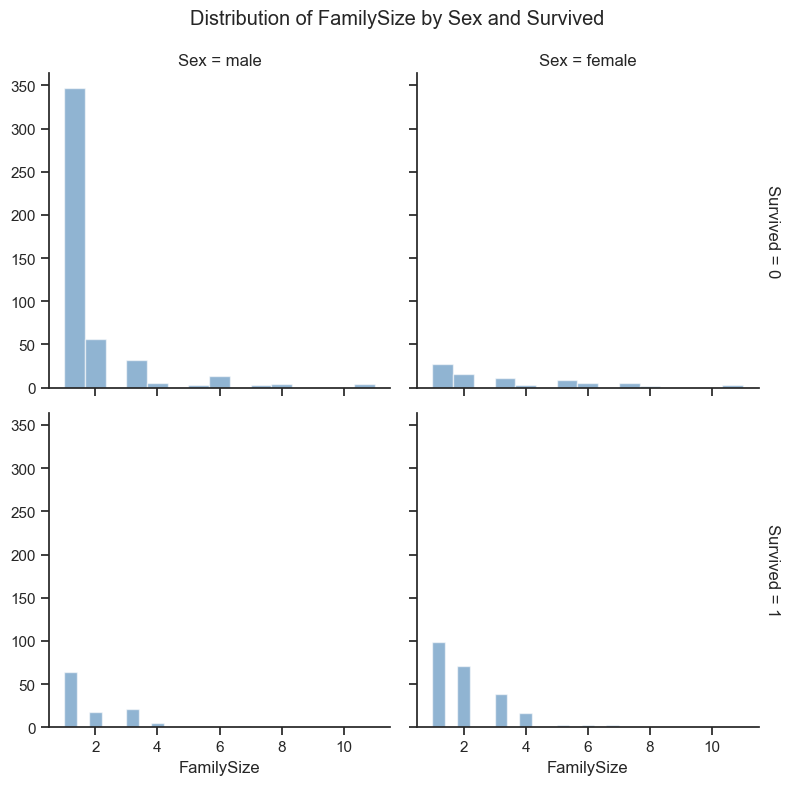

<Figure size 640x480 with 0 Axes>

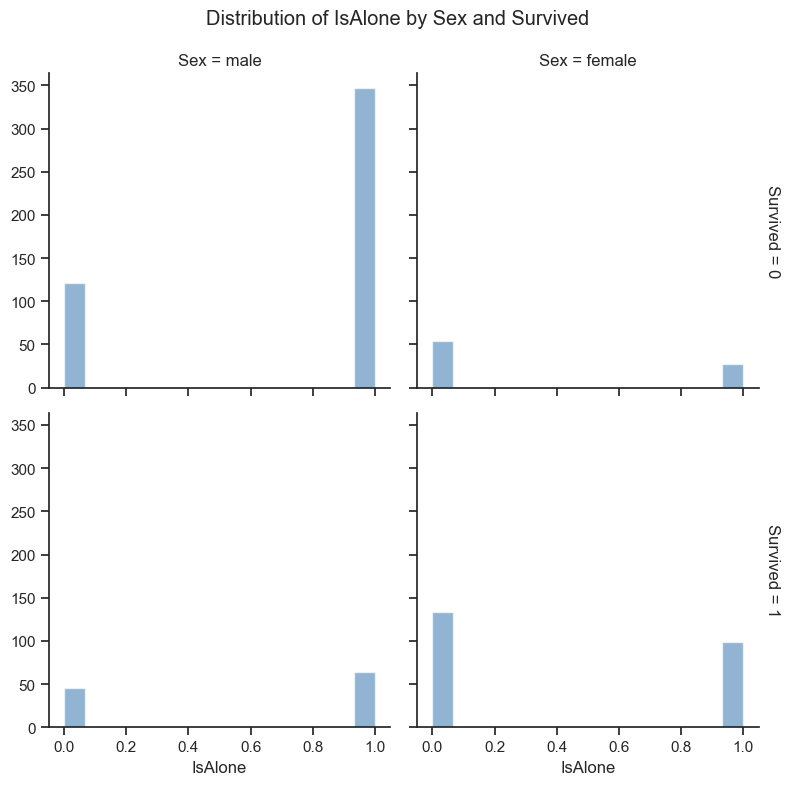

<Figure size 640x480 with 0 Axes>

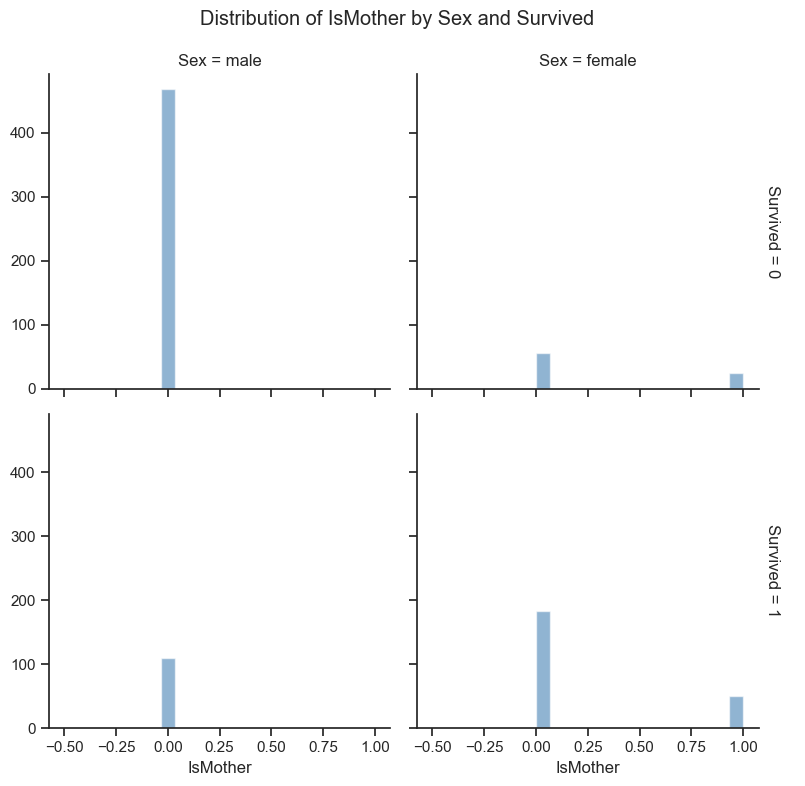

<Figure size 640x480 with 0 Axes>

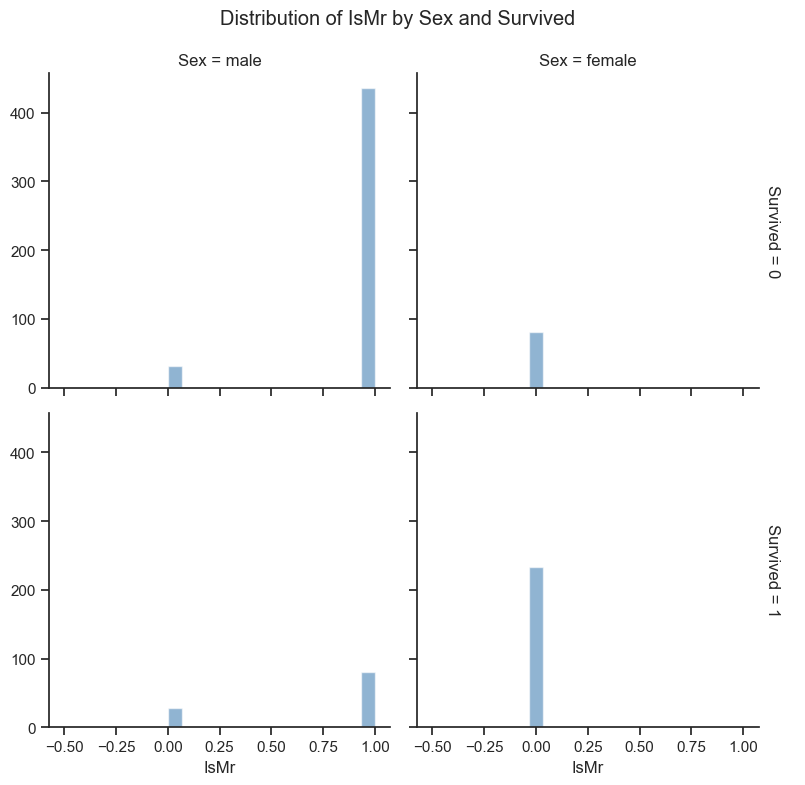

<Figure size 640x480 with 0 Axes>

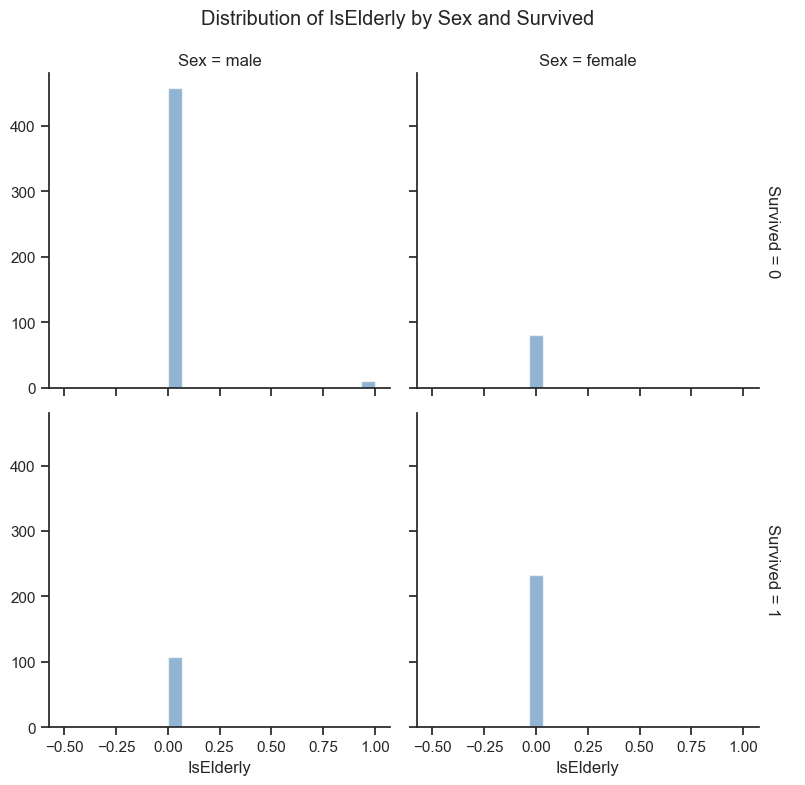

<Figure size 640x480 with 0 Axes>

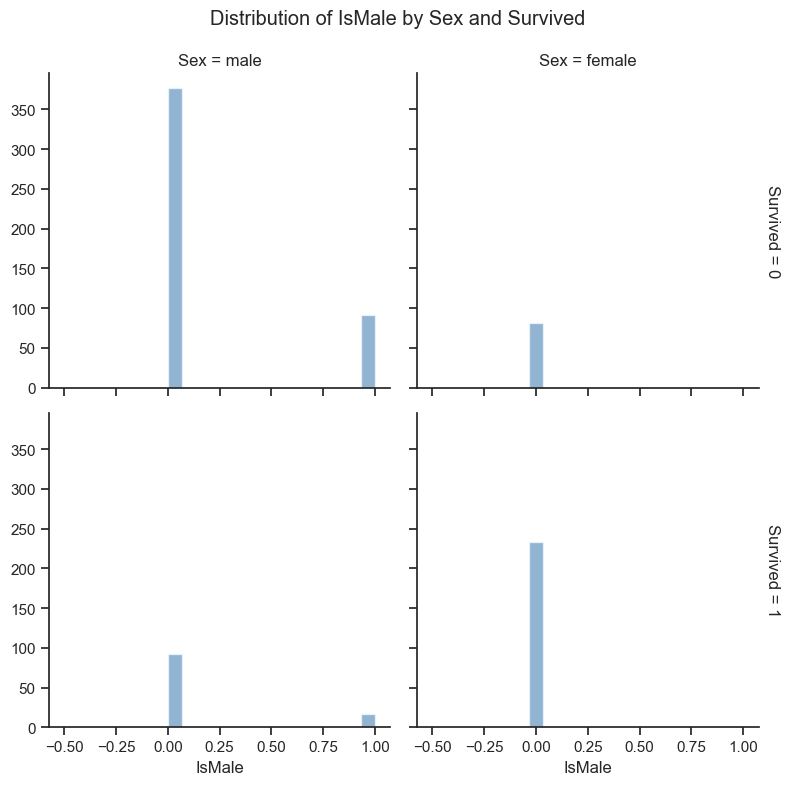

<Figure size 640x480 with 0 Axes>

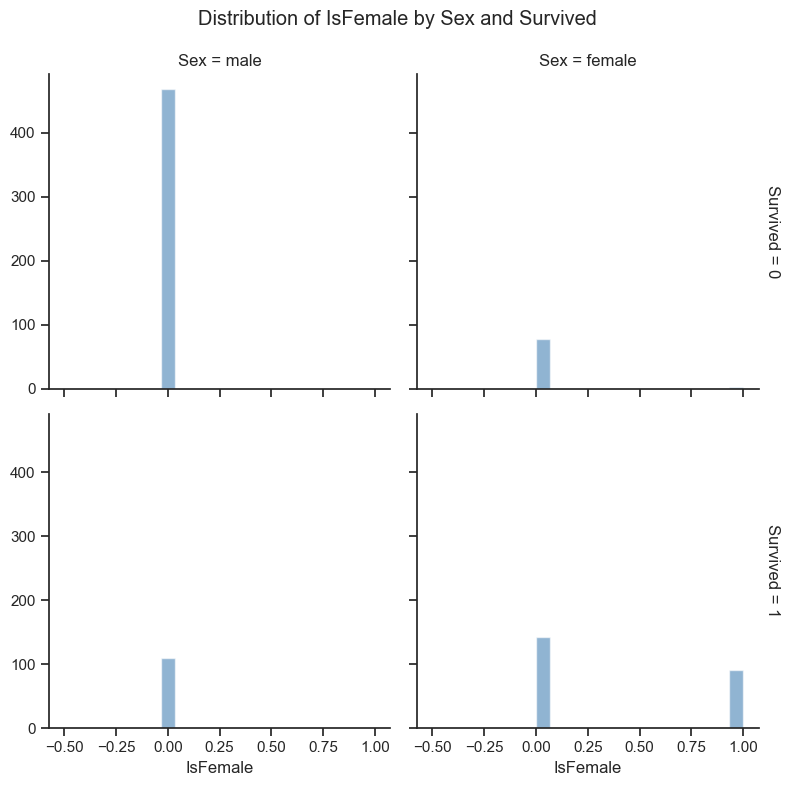

In [17]:
def criar_graficos(df):
    # Configurando o ambiente de plotagem
    sns.set(style="ticks")
    
    # Selecionar variáveis numéricas
    num_vars = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Configurar o número de gráficos e sua disposição
    n_vars = len(num_vars)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas de gráficos
    
    # Criar um FacetGrid para plotar histogramas separados por 'Sex' e 'Survived'
    for var in num_vars:
        plt.figure(figsize=(6.4, 4.8))
        g = sns.FacetGrid(df, col="Sex", row="Survived", height=4, aspect=1, margin_titles=True)
        g.map(plt.hist, var, bins=15, color='steelblue', alpha=0.6)
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Distribution of {var} by Sex and Survived')
        g.add_legend()
    plt.show()

# Testando a função com dados de treino
print("\nGráficos - Treino:")
criar_graficos(train_data)

### Engenharia de atributos

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preparar características e alvo
y = train_data['Survived']
X = train_data.drop(['Survived'], axis=1)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Definindo as colunas numéricas e categóricas
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex',  'Embarked', 'Title', 'IsMr', 'AgeGroup', 
                        'IsElderly', 'IsAlone', 'FareGroup', 'IsMother', 'IsMale', 
                        'IsFemale', 'Age_bin', 'Fare_bin', 'Has_Cabin']

# Criando o transformador para as variáveis numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#### Correlation matrix for features and target

Correlação de ponto bisserial para Pclass e Target: -0.3311019691460694
Correlação de ponto bisserial para Sex e Target: -0.5357803668867283
Correlação de ponto bisserial para Embarked e Target: -0.15719121934559854
Correlação de ponto bisserial para Title e Target: -0.03849021832188544
Correlação de ponto bisserial para IsMr e Target: -0.5477875388421615
Correlação de ponto bisserial para AgeGroup e Target: -0.01931071823113744
Correlação de ponto bisserial para IsElderly e Target: -0.059436754225565956
Correlação de ponto bisserial para IsAlone e Target: -0.1991329951471957
Correlação de ponto bisserial para FareGroup e Target: 0.2950180932265184
Correlação de ponto bisserial para IsMother e Target: 0.18489404142380128
Correlação de ponto bisserial para IsMale e Target: -0.1748097079531337
Correlação de ponto bisserial para IsFemale e Target: 0.3979531769821493
Correlação de ponto bisserial para Age_bin e Target: -0.0722354605827612
Correlação de ponto bisserial para Fare_bin e Targe

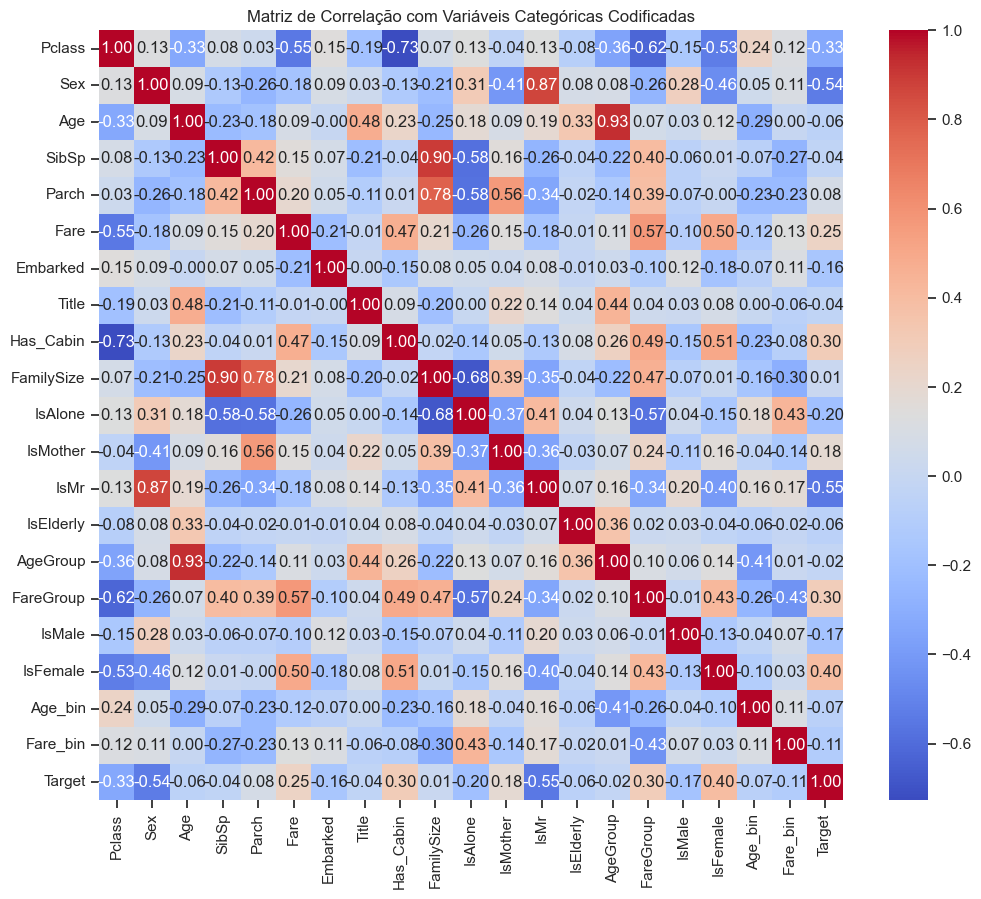

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import pointbiserialr
import numpy as np

# Exemplo de colunas
categorical_cols = categorical_features
numeric_cols = numeric_features

# Preparar o Label Encoder para colunas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))  # Convertendo e codificando
    label_encoders[col] = le

# Adicionando y_train para cálculo de correlação
X_train_with_target = X_train.copy()
X_train_with_target['Target'] = y_train

# Calcular a matriz de correlação incluindo variáveis categóricas tratadas
correlation_matrix = X_train_with_target.corr()

# Calcular correlações de ponto bisserial para combinações categóricas
for col in categorical_cols:
    correlation, _ = pointbiserialr(X_train_with_target[col], X_train_with_target['Target'])
    print(f"Correlação de ponto bisserial para {col} e Target: {correlation}")

# Visualização de correlações usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação com Variáveis Categóricas Codificadas')
plt.show()


#### Features importance

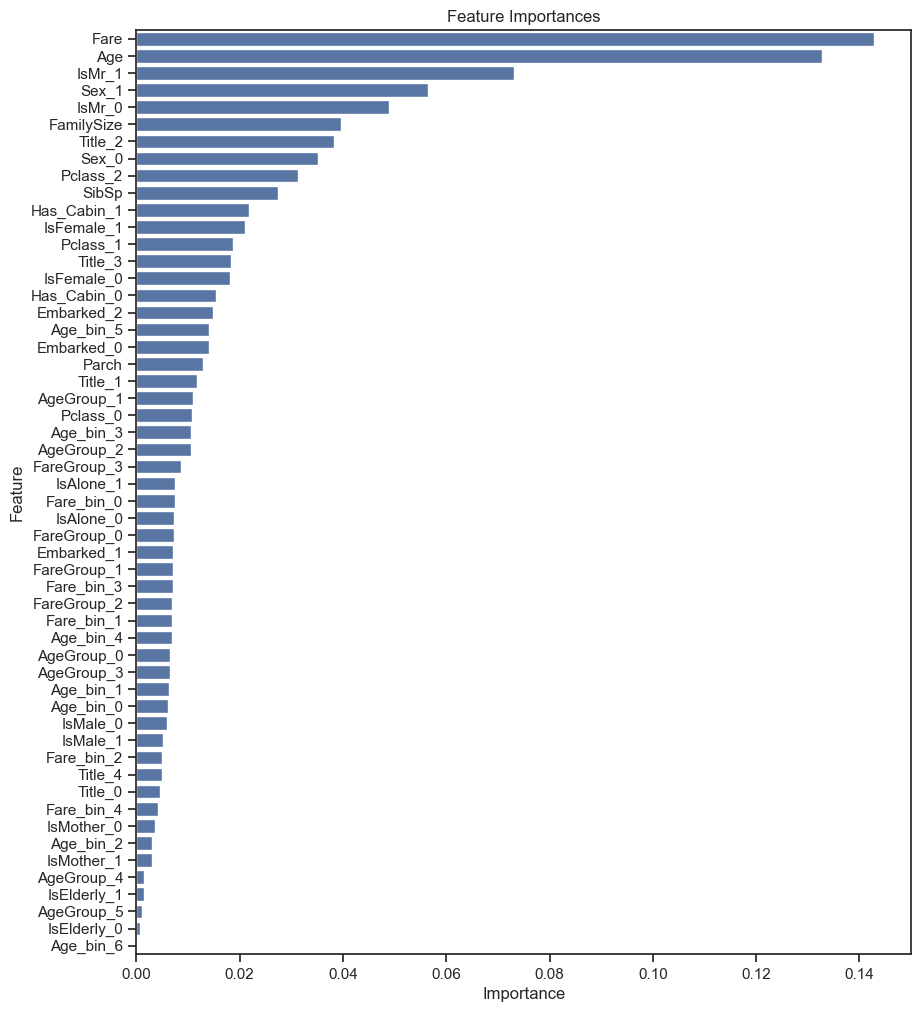

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que X_train_with_target já esteja definido e contenha todas as variáveis, incluindo a variável alvo
X_train_ = X_train_with_target.drop('Target', axis=1)
y_train_ = X_train_with_target['Target']

# Preparando o preprocessador com OneHotEncoder para categóricas e StandardScaler para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Criando o modelo de RandomForest para avaliar a importância das características
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinando o modelo
rf.fit(X_train_, y_train_)

# Obtendo importâncias das características
feature_importances = rf.named_steps['classifier'].feature_importances_

# Transformando os nomes das características após OneHotEncoding
feature_names = numeric_cols + \
    list(rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Criando DataFrame para visualizar as importâncias
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotando a importância das características
plt.figure(figsize=(10, 12))
plt.title('Feature Importances')
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.show()


### Preprocessor

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
# categorical_features = ['Pclass', 'Sex',  'Embarked', 'Title', 'IsMr', 'AgeGroup', 
#                         'IsElderly', 'IsAlone', 'FareGroup', 'IsMother', 'IsMale', 
#                         'IsFemale', 'Age_bin', 'Fare_bin', 'Has_Cabin']

# Preparar características e alvo
y = train_data['Survived']
X = train_data.drop(['Survived', 'Age', 'SibSp', 'Fare', 'IsMr', 'AgeGroup', 
                     'IsElderly', 'IsAlone', 'FareGroup', 'IsMother', 'IsMale', 'IsFemale'], axis=1)

test_data.drop(['Age', 'SibSp', 'Fare', 'IsMr','IsElderly', 'IsAlone', 'IsMother', 
                'IsMale', 'IsFemale'], axis=1, inplace=True)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Definindo as colunas numéricas e categóricas
numeric_features = ['Parch', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Has_Cabin', 'Title', 'Age_bin', 'Fare_bin']

# Criando o transformador para as variáveis numéricas e categóricas 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Machine learning models

### Gradient Boosting Classifier

Classificação Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.80      0.89      0.84        36

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90

Acurácia: 0.8666666666666667
Log Loss: 0.38544902985804647
ROC-AUC Score: 0.9210390946502058


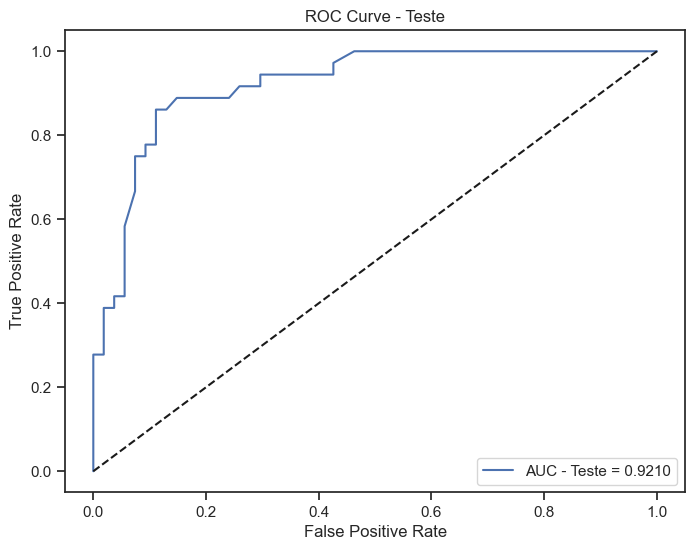

Melhores Parâmetros: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 6, 'classifier__n_estimators': 400, 'classifier__subsample': 0.7}
Melhor Score de Acurácia: 0.8252096273291926


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, 
#                                                   criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
#                                                   min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
#                                                   init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, 
#                                                   warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, 
#                                                   ccp_alpha=0.0)


# Criando o pipeline com o preprocessador e o modelo
clf_gbc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(random_state = 1))])

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 1000],
    'classifier__max_depth': [6, 10, 20],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__subsample': [0.7, 0.85, 1]
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_gbc, param_grid, cv=5, scoring='accuracy', verbose=0)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_gbc = grid_search.best_estimator_
y_pred_test = best_gbc.predict(X_test)
y_pred_proba_test = best_gbc.predict_proba(X_test)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, y_pred_proba_test))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y_test, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print the best parameters and best score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### Random Forest

Classificação Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.81      0.83      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

Acurácia: 0.8555555555555555
Log Loss: 0.3889686878708622
ROC-AUC Score: 0.9071502057613169


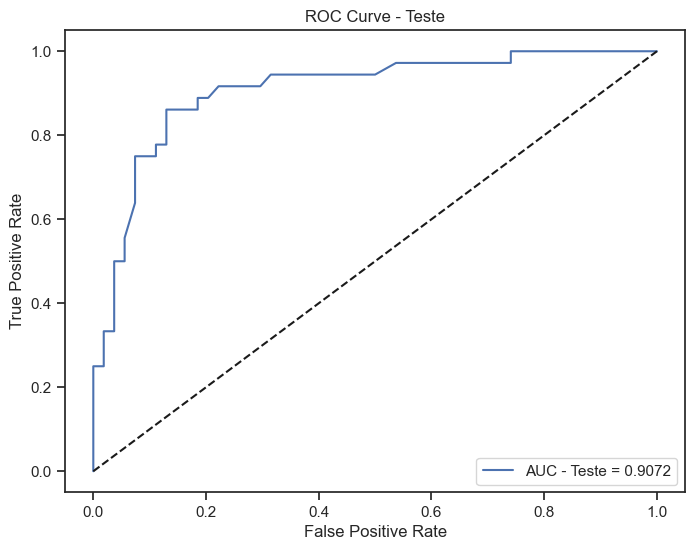

Melhores Parâmetros: {'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Melhor Score de Acurácia: 0.8402018633540372


In [32]:
from sklearn.ensemble import RandomForestClassifier

# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                               bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
#                                               class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

# Criando o pipeline com o preprocessador e o modelo
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state = 1))])

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 400],
    'classifier__max_depth': [6, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
    'classifier__criterion' : ["gini", "entropy"],
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=0)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test)
y_pred_proba_test = best_rf.predict_proba(X_test)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, y_pred_proba_test))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y_test, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print the best parameters and best score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### XGBoost

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.79      0.86      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90

Acurácia: 0.8555555555555555
Log Loss: 0.3877983123076245
ROC-AUC Score: 0.9117798353909465


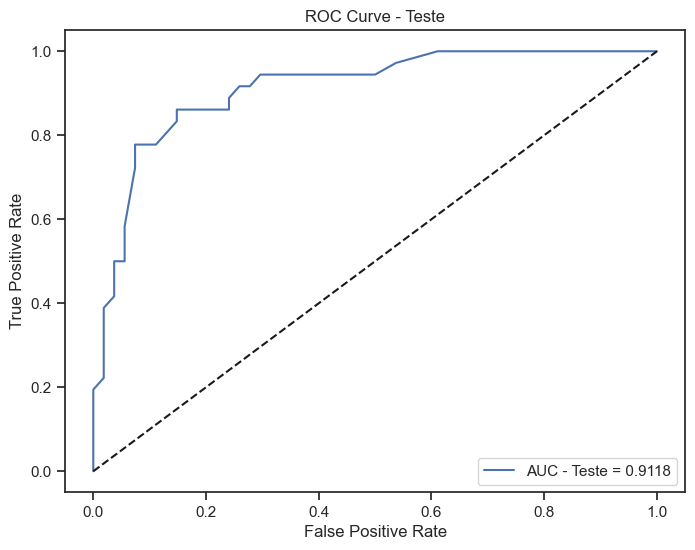

Melhores Parâmetros: {'classifier__eta': 0.01, 'classifier__gamma': 1, 'classifier__max_depth': 10, 'classifier__min_child_weight': 4, 'classifier__n_estimators': 400}
Melhor Score de Acurácia: 0.8289518633540374


In [33]:
from xgboost import XGBClassifier

# Configurando o pipeline com o preprocessador e o modelo XGBoost
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=1))
])

# Definindo os parâmetros para o GridSearchCV específicos para XGBoost
param_grid = {
    'classifier__n_estimators': [100, 200, 400],
    'classifier__max_depth': [6, 10, 20],
    'classifier__eta': [0.01, 0.09, 0.2, 0.3],
    'classifier__gamma': [0.4, 0.5, 0.6, 0.7, 1],
    'classifier__min_child_weight': [2, 3, 4, 5, 7, 9],

}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_xgb, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_xgb = grid_search.best_estimator_
y_pred_test = best_xgb.predict(X_test)
y_pred_proba_test = best_xgb.predict_proba(X_test)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, y_pred_proba_test))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y_test, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### Decision Tree Classifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.79      0.86      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90

Acurácia: 0.8555555555555555
Log Loss: 0.7106019273881603
ROC-AUC Score: 0.9295267489711935


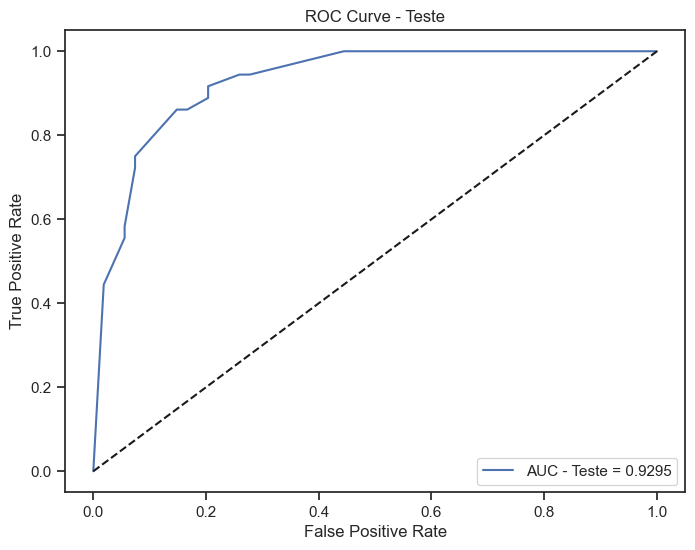

Melhores Parâmetros: {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 20}
Melhor Score de Acurácia: 0.8189829192546585


In [35]:
from sklearn.tree import DecisionTreeClassifier

# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#                                           random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                           class_weight=None, ccp_alpha=0.0, monotonic_cst=None)


# Configurando o pipeline com o preprocessador e o modelo Decision Tree
clf_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=1))
])

# Definindo os parâmetros para o GridSearchCV específicos para Decision Tree
param_grid = {
    'classifier__max_depth': [6, 10, 20],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_dt, param_grid, cv=5, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_dt = grid_search.best_estimator_
y_pred_test = best_dt.predict(X_test)
y_pred_proba_test = best_dt.predict_proba(X_test)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, y_pred_proba_test))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y_test, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### Logistic regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

Acurácia: 0.8333333333333334


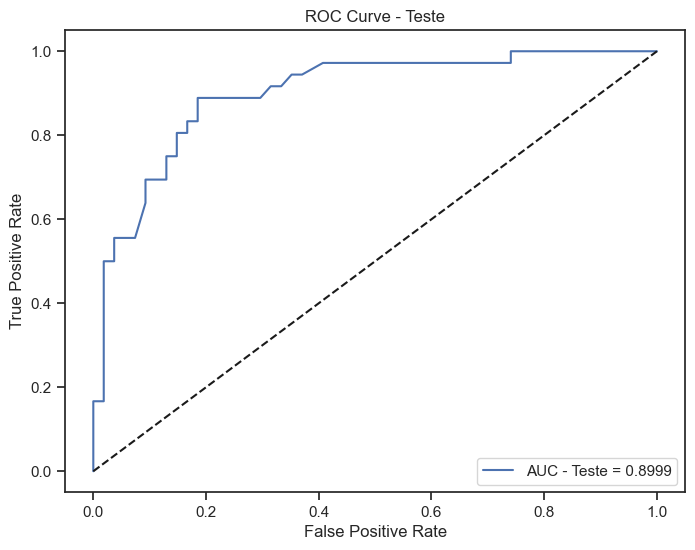

Melhores Parâmetros: {'classifier__C': 0.1, 'classifier__max_iter': 200, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Melhor Score de Acurácia: 0.8202251552795031


In [36]:
from sklearn.linear_model import LogisticRegression

# Configurando o pipeline com o preprocessador e o modelo Logistic Regression
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=1))
])

# Definindo os parâmetros para o GridSearchCV específicos para Logistic Regression
param_grid = {
    'classifier__C': [0.1],
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [200, 400, 1000] 
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_lr = grid_search.best_estimator_
y_pred_test = best_lr.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
fpr_test, tpr_test, thresholds = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc_test = roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### Support Vector Machine SVM

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

Acurácia: 0.8444444444444444


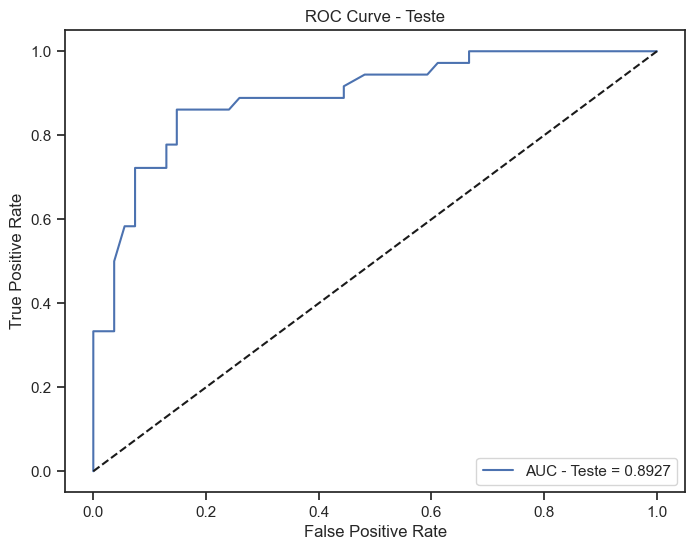

Melhores Parâmetros: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Melhor Score de Acurácia: 0.8339363354037268


In [37]:
from sklearn.svm import SVC

# Configurando o pipeline com o preprocessador e o modelo SVM
clf_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=1, probability=True))  # probability=True for ROC curve
])

# Definindo os parâmetros para o GridSearchCV específicos para SVM
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_svm, param_grid, cv=5, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_svm = grid_search.best_estimator_
y_pred_test = best_svm.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
fpr_test, tpr_test, thresholds = roc_curve(y_test, best_svm.predict_proba(X_test)[:, 1])
roc_auc_test = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### MLPClassifier

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\junio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\junio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\junio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\junio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Classificação Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

Acurácia: 0.8333333333333334


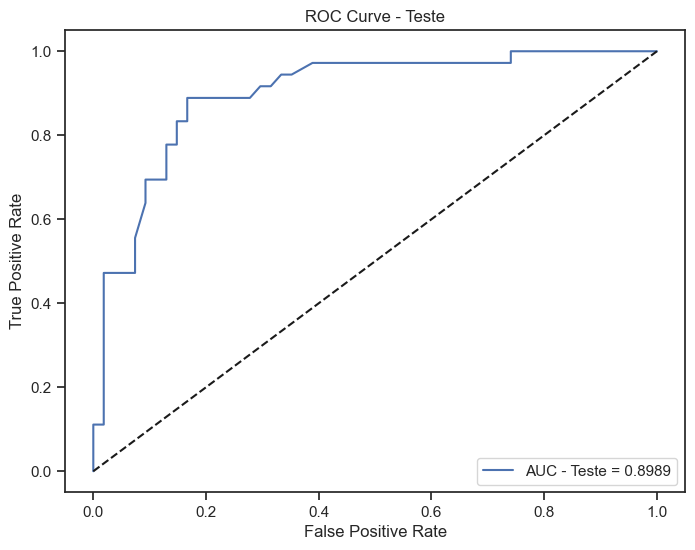

Melhores Parâmetros: {'classifier__activation': 'tanh', 'classifier__alpha': 0.05, 'classifier__hidden_layer_sizes': (50,), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 500, 'classifier__solver': 'adam'}
Melhor Score de Acurácia: 0.8276785714285714


In [38]:
from sklearn.neural_network import MLPClassifier

# Configurando o pipeline com o preprocessador e o modelo de rede neural
clf_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=1))
])

# Definindo os parâmetros para o GridSearchCV específicos para MLPClassifier
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__learning_rate': ['constant', 'adaptive'],
    'classifier__max_iter': [50, 100, 200]
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_nn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_nn = grid_search.best_estimator_
y_pred_test = best_nn.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
# MLPClassifier não suporta predict_proba se não estiver usando a função de ativação logística
# Usaremos decision_function se estiver disponível
if "predict_proba" in dir(best_nn['classifier']):
    proba_test = best_nn.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, proba_test)
    roc_auc_test = roc_auc_score(y_test, proba_test)
elif "decision_function" in dir(best_nn['classifier']):
    scores_test = best_nn.decision_function(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
    roc_auc_test = roc_auc_score(y_test, scores_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### KNN

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90

Acurácia: 0.8111111111111111


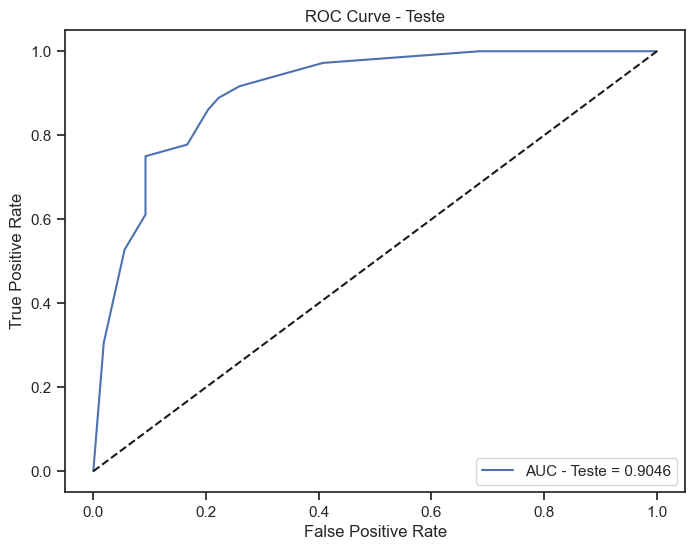

Melhores Parâmetros: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}
Melhor Score de Acurácia: 0.8189518633540374


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Configurando o pipeline com o preprocessador e o modelo k-NN
clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Definindo os parâmetros para o GridSearchCV específicos para KNeighborsClassifier
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 10],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Criar o GridSearchCV para automatizar a busca pelo melhor modelo e parâmetros
grid_search = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_knn = grid_search.best_estimator_
y_pred_test = best_knn.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
if "predict_proba" in dir(best_knn['classifier']):
    proba_test = best_knn.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, proba_test)
    roc_auc_test = roc_auc_score(y_test, proba_test)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Teste')
    plt.legend(loc='lower right')
    plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### Naive Bayes

Classificação Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        54
           1       0.85      0.61      0.71        36

    accuracy                           0.80        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90

Acurácia: 0.8


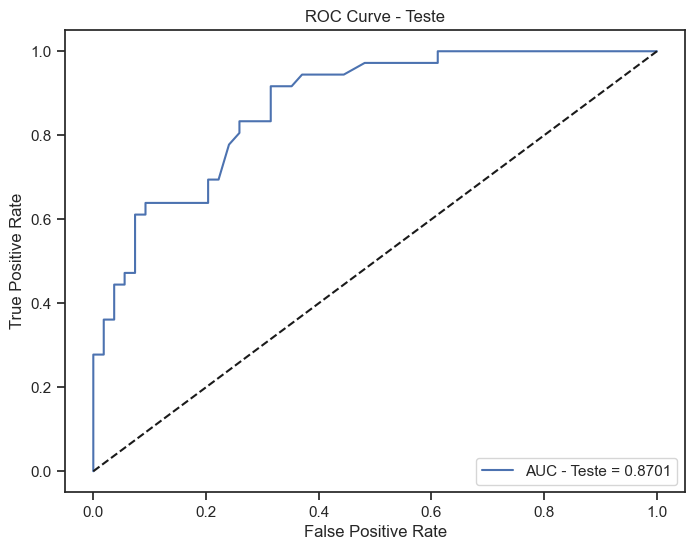

In [40]:
from sklearn.naive_bayes import GaussianNB

# Configurando o pipeline com o preprocessador e o modelo Naive Bayes
clf_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Usando X_train e y_train para ajustar o modelo
clf_nb.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred_test = clf_nb.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
proba_test = clf_nb.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, proba_test)
roc_auc_test = roc_auc_score(y_test, proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

### Bagging Classifier

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        54
           1       0.78      0.86      0.82        36

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.85        90

Acurácia: 0.8444444444444444


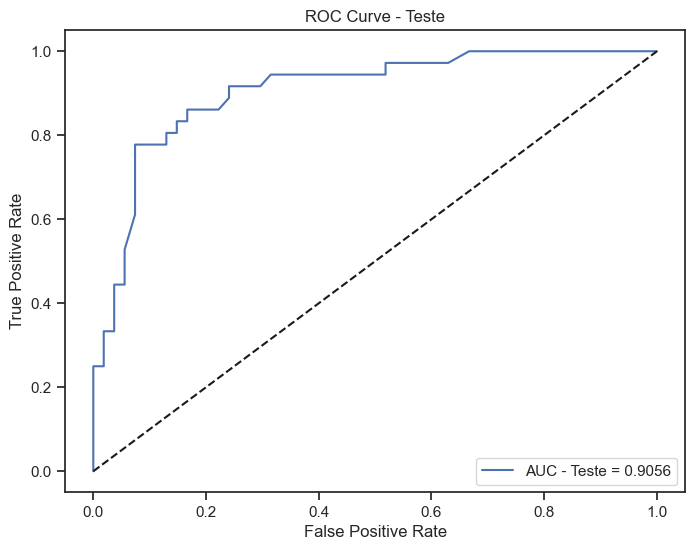

Melhores Parâmetros: {'classifier__estimator__max_depth': 10, 'classifier__max_features': 0.5, 'classifier__max_samples': 0.5, 'classifier__n_estimators': 100}
Melhor Score de Acurácia: 0.8302314814814815


In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Configurando o pipeline com o preprocessador e o modelo Bagging
clf_bagging = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier(),
                                     n_estimators=100,
                                     random_state=1))
])

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_samples': [0.5, 1.0],
    'classifier__max_features': [0.5, 1.0],
    'classifier__estimator__max_depth': [10, 20, None]  # Ajustado para `estimator__max_depth`
}

# Criar o GridSearchCV
grid_search = GridSearchCV(clf_bagging, param_grid, cv=10, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_bagging = grid_search.best_estimator_
y_pred_test = best_bagging.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
proba_test = best_bagging.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, proba_test)
roc_auc_test = roc_auc_score(y_test, proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### AdaBoost Classifier

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Classificação Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

Acurácia: 0.8333333333333334


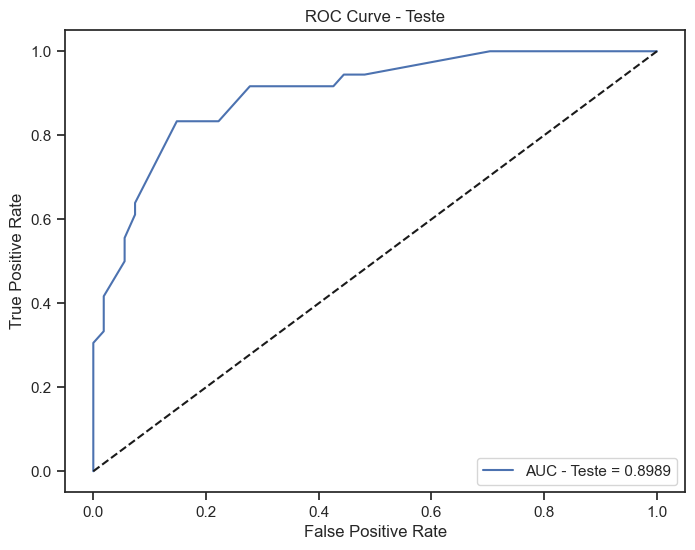

Melhores Parâmetros: {'classifier__algorithm': 'SAMME', 'classifier__estimator__max_depth': 2, 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Melhor Score de Acurácia: 0.8314440993788821


In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Configurando o pipeline com o preprocessador e o modelo AdaBoost
clf_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                      random_state=1))
])

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 1.0],
    'classifier__estimator__max_depth': [1, 2],
    'classifier__algorithm':['SAMME']
}

# Criar o GridSearchCV
grid_search = GridSearchCV(clf_adaboost, param_grid, cv=5, scoring='accuracy', verbose=1)

# Usando X_train e y_train para ajustar o modelo
grid_search.fit(X_train, y_train)

# Avaliação no conjunto de teste com o melhor modelo encontrado
best_adaboost = grid_search.best_estimator_
y_pred_test = best_adaboost.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
proba_test = best_adaboost.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, proba_test)
roc_auc_test = roc_auc_score(y_test, proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Print dos melhores parâmetros e do melhor score de acurácia encontrado
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Acurácia:", grid_search.best_score_)

### Stacking Classifier

Classificação Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        54
           1       0.78      0.86      0.82        36

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.85        90

Acurácia: 0.8444444444444444


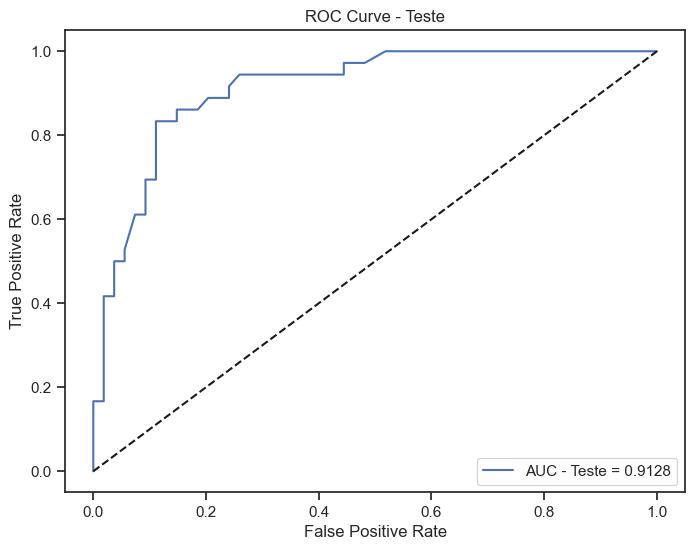

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Definindo os modelos base para o stacking
estimators = [
    ('lr', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# Configurando o pipeline com o preprocessador e o StackingClassifier
clf_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5
    ))
])

# Treinando o modelo
clf_stacking.fit(X_train, y_train)

# Avaliação no conjunto de teste
y_pred_test = clf_stacking.predict(X_test)

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))

# Plot da Curva ROC
proba_test = clf_stacking.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, proba_test)
roc_auc_test = roc_auc_score(y_test, proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

# Estimating values with best model

In [56]:
test_data_predictions = best_rf.predict(test_data)
test_data['Survived'] = test_data_predictions

In [57]:
test_data[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Exporta o resultado final para submissão

In [59]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_data.Survived})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
